# HomeWork 6 Problem 1A and 1B

# Matthew Anderson | 801203905

# Github https://github.com/Mand187/Intro-to-ML


In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import Callback

In [134]:
def loadHousingData():
    url = 'https://raw.githubusercontent.com/Mand187/Intro-to-ML/refs/heads/master/Data/Housing.csv'
    housingData = pd.read_csv(url)
    return housingData

In [135]:
def binaryMapping(x):
    return x.map({'yes': 1, 'no': 0})

def preprocessHousingData(housingData):
    varlist = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
    housingData[varlist] = housingData[varlist].apply(binaryMapping)

    housingData = pd.get_dummies(housingData, columns=['furnishingstatus'])

    X = housingData.drop(columns=['price'])
    y = housingData['price']

    return X, y

In [136]:
def createNeuralNetworkModel(input_dim, hidden_layers=1):
    model = Sequential()

    # Input layer
    model.add(Dense(32, input_dim=input_dim, activation='tanh'))

    # Additional hidden layers
    for _ in range(hidden_layers - 1):
        model.add(Dense(64, activation='tanh'))

    # Output layer
    model.add(Dense(1, activation='linear'))

    # Compile the model with SGD optimizer and MSE loss
    model.compile(optimizer=SGD(learning_rate=0.0001), loss='mean_squared_error')

    return model

In [137]:
class CustomVerboseCallback(Callback):
    def __init__(self, report_frequency=100):
        super().__init__()
        self.report_frequency = report_frequency

    def on_epoch_end(self, epoch, logs=None):
        if (epoch + 1) % self.report_frequency == 0:
            print(f"Epoch {epoch + 1}: Training Loss = {logs['loss']:.4f}, Validation Loss = {logs['val_loss']:.4f}")

def trainNeuralNetwork(X_train, y_train, X_val, y_val, hidden_layers=1):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)

    # Create model
    model = createNeuralNetworkModel(X_train.shape[1], hidden_layers)

    # Early stopping
    early_stopping = EarlyStopping(monitor='val_loss', patience=200, restore_best_weights=True)

    # Custom callback for verbose output every 100 epochs
    custom_callback = CustomVerboseCallback(report_frequency=500)

    # Train the model using fit
    start_time = time.time()
    history = model.fit(
        X_train_scaled, y_train,
        validation_data=(X_val_scaled, y_val),
        epochs=2500,
        batch_size=32,
        callbacks=[early_stopping, custom_callback],
        verbose=0
    )
    training_time = time.time() - start_time

    return model, history, training_time

In [138]:
def plotTrainingHistory(history, title):
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(title)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

Part A: Single Hidden Layer Neural Network


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 500: Training Loss = 3111355154432.0000, Validation Loss = 4927842680832.0000
Epoch 1000: Training Loss = 2341791858688.0000, Validation Loss = 3754954063872.0000
Epoch 1500: Training Loss = 2006747709440.0000, Validation Loss = 3233063632896.0000
Epoch 2000: Training Loss = 1806864613376.0000, Validation Loss = 2933089370112.0000
Epoch 2500: Training Loss = 1672164802560.0000, Validation Loss = 2741679685632.0000
Training Time: 304.20 seconds
Final Training Loss: 1672164802560.0000
Final Validation Loss: 2741679685632.0000


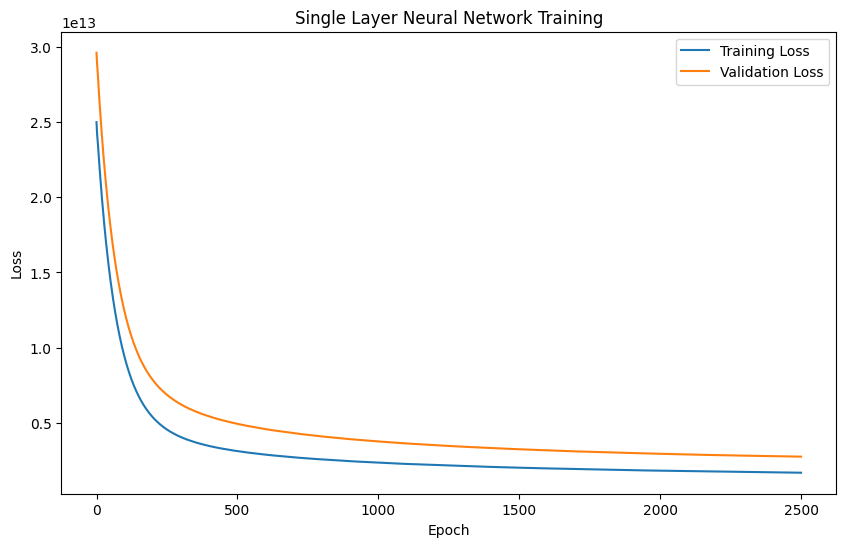

In [139]:
# Load and preprocess data
housingData = loadHousingData()
X, y = preprocessHousingData(housingData)

# Split data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Part a: Single Hidden Layer Neural Network
print("Part A: Single Hidden Layer Neural Network")
model_single, history_single, training_time_single = trainNeuralNetwork(X_train, y_train, X_val, y_val, hidden_layers=1)

print(f"Training Time: {training_time_single:.2f} seconds")
print(f"Final Training Loss: {history_single.history['loss'][-1]:.4f}")
print(f"Final Validation Loss: {history_single.history['val_loss'][-1]:.4f}")

# Plot training history for single layer
plotTrainingHistory(history_single, 'Single Layer Neural Network Training')


Part B: Multi-Layer Neural Network


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 500: Training Loss = 2726485032960.0000, Validation Loss = 4477336158208.0000
Epoch 1000: Training Loss = 2416976068608.0000, Validation Loss = 4131196502016.0000
Epoch 1500: Training Loss = 2233240387584.0000, Validation Loss = 3917741555712.0000
Epoch 2000: Training Loss = 2105901842432.0000, Validation Loss = 3771818049536.0000
Epoch 2500: Training Loss = 2012507144192.0000, Validation Loss = 3657129263104.0000
Training Time: 315.92 seconds
Final Training Loss: 2012507144192.0000
Final Validation Loss: 3657129263104.0000


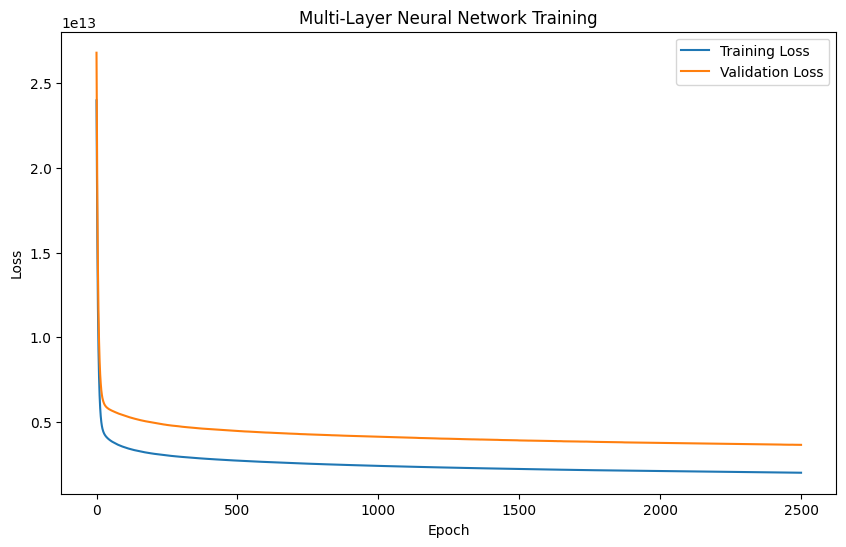

In [140]:
# Part b: Multi-Layer Neural Network
print("\nPart B: Multi-Layer Neural Network")
model_multi, history_multi, training_time_multi = trainNeuralNetwork(X_train, y_train, X_val, y_val, hidden_layers=3)

print(f"Training Time: {training_time_multi:.2f} seconds")
print(f"Final Training Loss: {history_multi.history['loss'][-1]:.4f}")
print(f"Final Validation Loss: {history_multi.history['val_loss'][-1]:.4f}")

# Plot training history for multi-layer
plotTrainingHistory(history_multi, 'Multi-Layer Neural Network Training')